In [2]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#pip install scipy

## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams ["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [4]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Onemli
Feature = independent variables = Input = Estimator = Attribute = (Bagimsiz Degisken)             
Target = Label = Dependent Variables = Output = Hedef Degisken = (Bagimli Degisken)          
Observation = Rows = Sample = Gozlem

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.sample(5)

,TV,radio,newspaper,sales
176,248.4,30.2,20.3,20.2
7,120.2,19.6,11.6,13.2
72,26.8,33.0,19.3,8.8
23,228.3,16.9,26.2,15.5
168,215.4,23.6,57.6,17.1


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


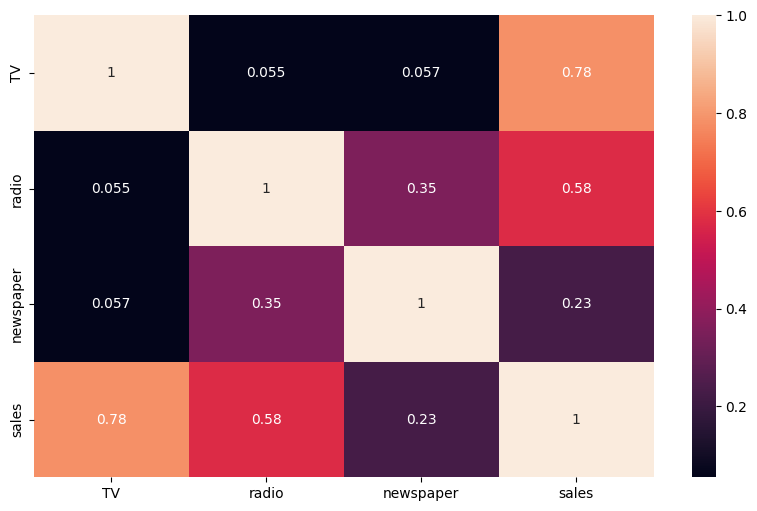

In [12]:
sns.heatmap(df.corr(), annot = True);

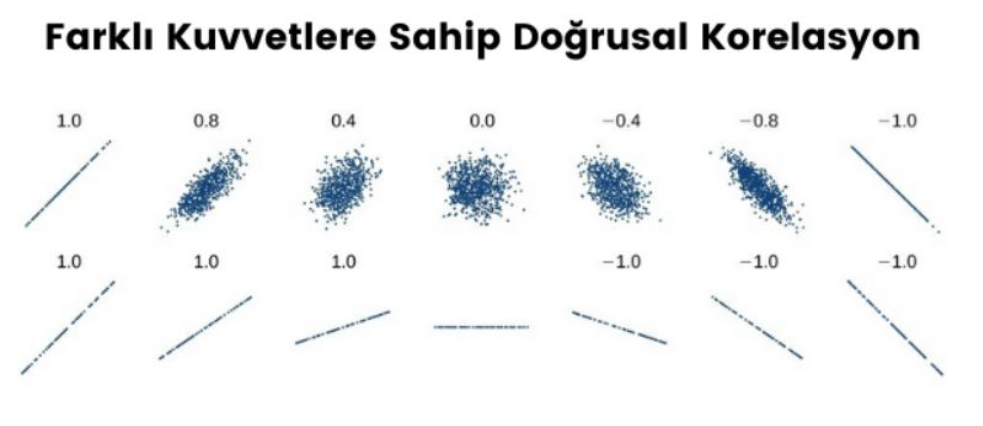

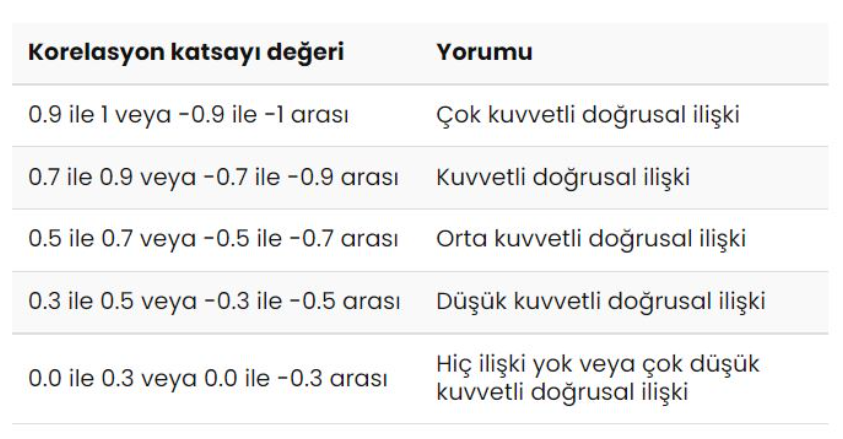

## Create new independent variable - Yeni bir feature oluşturalım feature enginnering

In [13]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [14]:
df = df.iloc[:,[0, 1, 2, 4, 3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


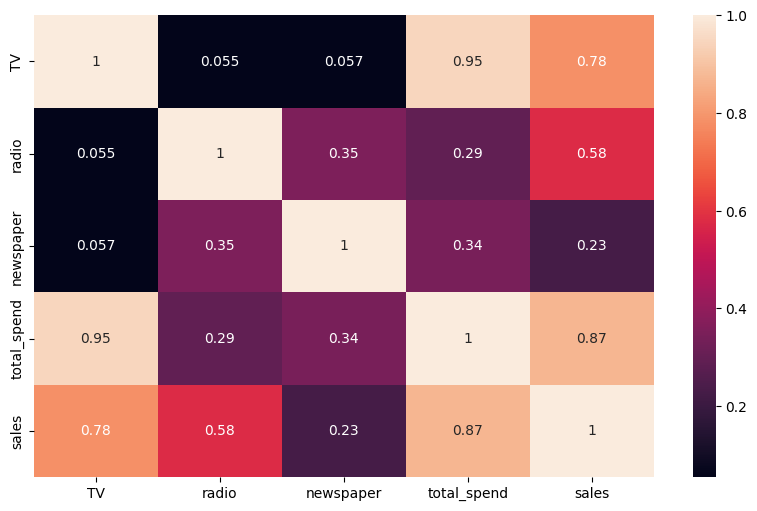

In [15]:
sns.heatmap(df.corr(), annot = True);

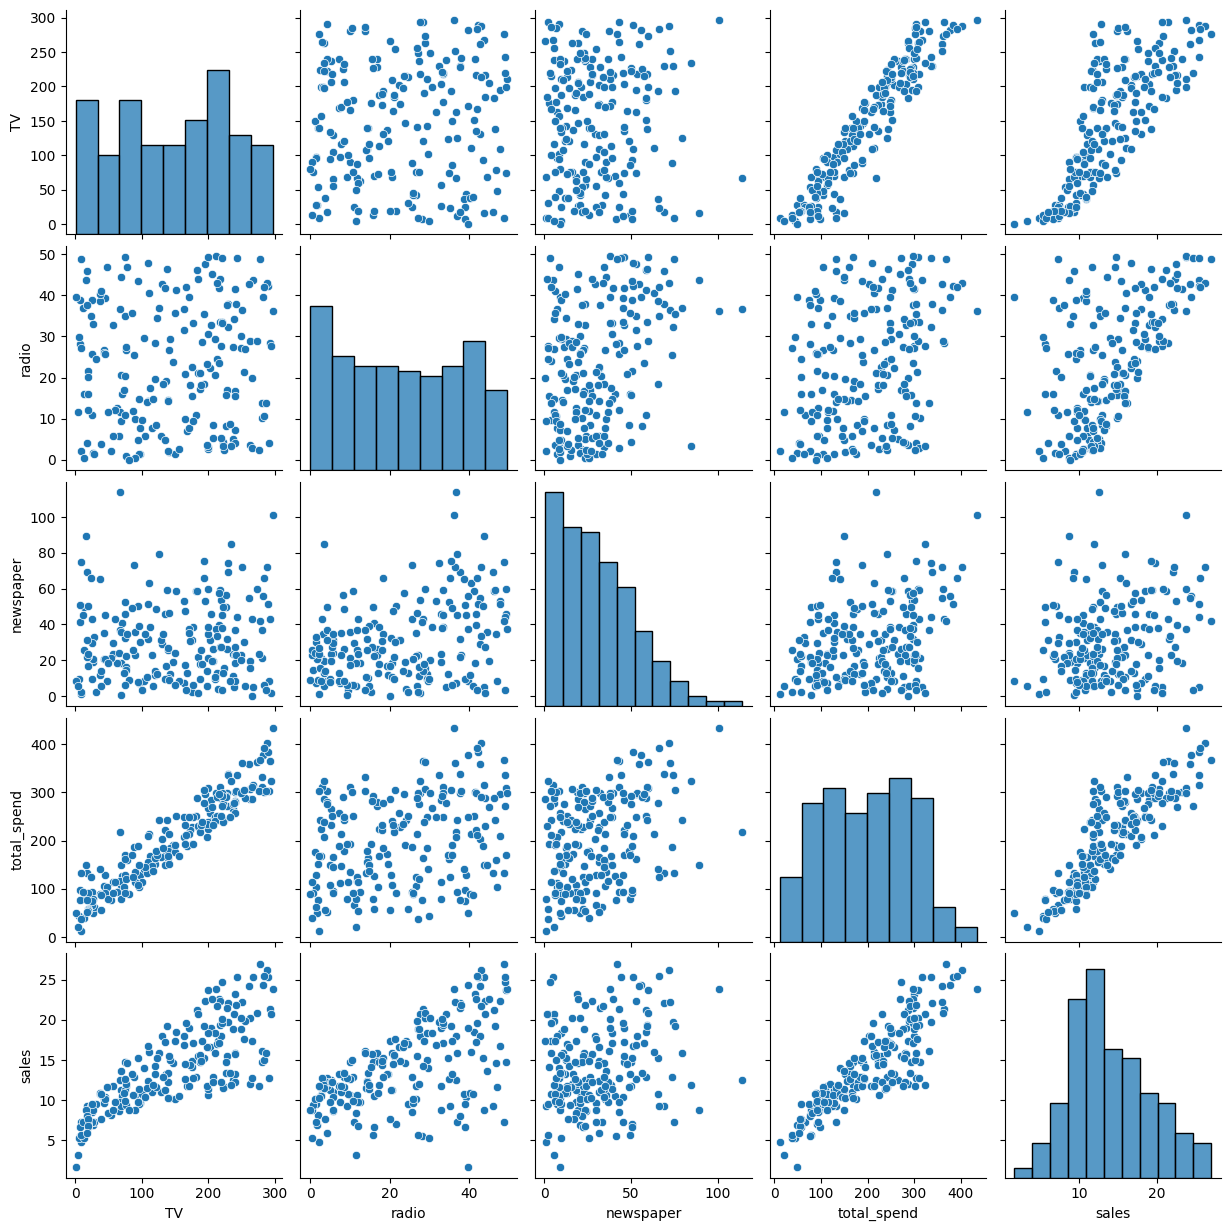

In [16]:
sns.pairplot(df);

In [24]:
#pip install scipy

In [18]:
#import scipy.stats as stats

In [19]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616066
corr between sales and radio       : 0.5762225745710552
corr between sales and newspaper   : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017418


In [20]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


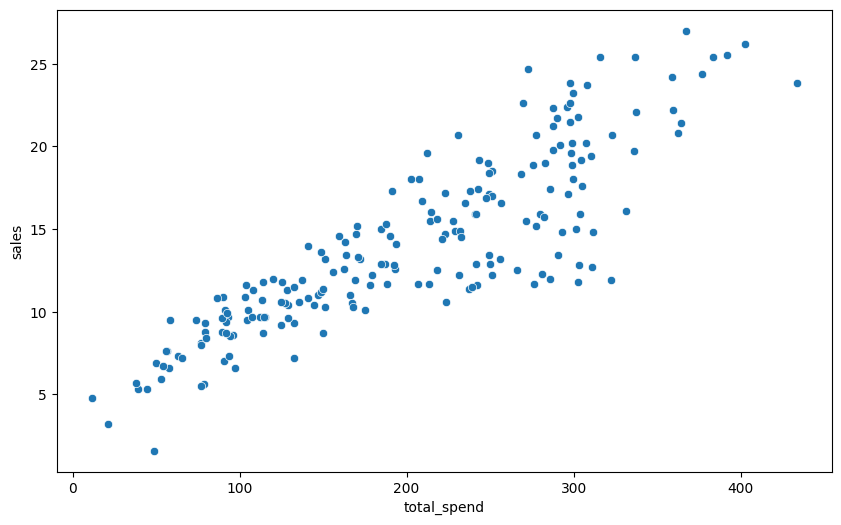

In [21]:
sns.scatterplot(x = "total_spend", y = "sales", data = df);

## Corelation Between Independent Variable And Dependent Variable

In [22]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017418

In [23]:
R2_score = corr**2
R2_score    # Elimdeki bagimsiz degisken ile bagimli degiskeni ne oranda acikliyorum

0.7529246402599592

# Linear Regression

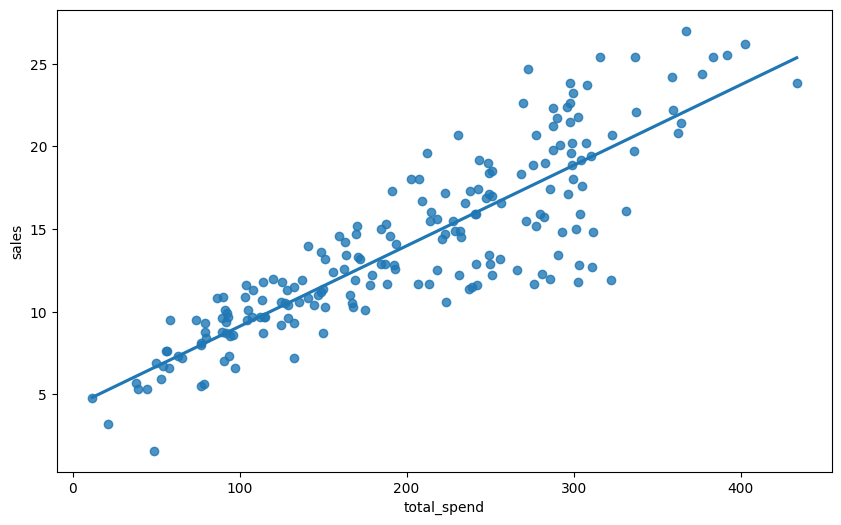

In [25]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None);

# Spliting the Dataset into X (Feature-independent variable) and y (target - dependent variable)

y  = b1 * X + b0

y  = Target = Dependent variable = bağımlı değişken

b1 = eğim/slope/katsayı =  0 < b1 <1 and -1 < b1 <0

X  = Feature = independent variable = bağımsız değişken

b0  = intercept = otonom parametre = başlangıç parametresi -∞ < b0 < +∞

In [26]:
X = df["total_spend"]
y = df["sales"]

In [27]:
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

## Determination of Coefficents (Slopes and Intercept)

In [28]:
slope, intercept = np.polyfit(X, y, deg = 1)

In [ ]:
y_pred = b1 * X + b0
y_pred

In [ ]:
values = {"actual":y, "predicted":y_pred, "residual": y-y_pred, "LSE" : (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2.head(20)

In [ ]:
df_2.residual.sum()

In [ ]:
df_2.residual.sum().round()

In [ ]:
df_2.LSE

In [ ]:
df_2.LSE.sum()

# Prediction with Simple Linear Regression

In [29]:
potential_spend = np.linspace(0 , 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [30]:
y_pred2 =b1*potential_spend +b0
y_pred2

NameError: name 'b1' is not defined

In [ ]:
plt.plot(potential_spend, y_pred2)
sns.scatterplot(x = "total_spend", y = "sales", data = df);